In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox 
from scipy.interpolate import interp1d
from matplotlib.colors import ListedColormap

In [2]:
def hover(event): #Event detection and replotting
    if cbar.contains(event)[0]:
        #click index
        ind = cbar.contains(event)[1]["ind"][1]
        imcode = df_vor['bin'][ind]
        #call plot of click index
        img = mpimg.imread('pop_fits/%i.png'%imcode)
        ax2.imshow(img)
    fig.canvas.draw_idle()
    
##make Sauron col map
x_col_pos = [1.0, 43.5, 86.0, 86.0+20, 128.5-10, 128.5, 128.5+10, 171.0-20, 171.0, 213.5, 256.0]

red =   [0.0, 0.0, 0.4,  0.5, 0.3, 0.0, 0.7, 1.0, 1.0,  1.0, 0.9]
green = [0.0, 0.0, 0.85, 1.0, 1.0, 0.9, 1.0, 1.0, 0.85, 0.0, 0.9]
blue =  [0.0, 1.0, 1.0,  1.0, 0.7, 0.0, 0.0, 0.0, 0.0,  0.0, 0.9]
col_lis = [red, green, blue]

#get points to map to
xnew = range(1,256)

#interpolation function
def interp_cols(x_col_pos, col):
	f = interp1d(x_col_pos, col, kind='linear')
	return(f(xnew))

col_grid = []
[col_grid.append(interp_cols(x_col_pos, i)) for i in col_lis]
col_arr = np.array(col_grid).T
cmap = ListedColormap(col_arr)

<IPython.core.display.Javascript object>


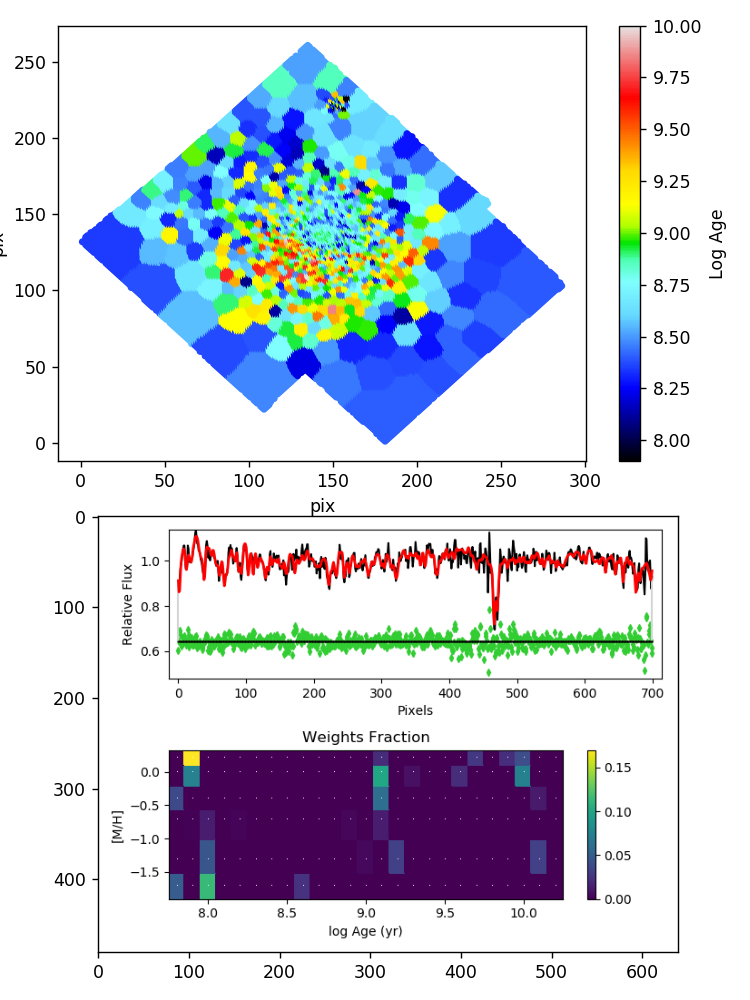

7

In [4]:
code = 'log_age' #column name

df_vor = pd.read_csv('coords_w_solutions.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))
plt.tight_layout()
cbar = ax1.scatter(df_vor['x'], df_vor['y'], c = df_vor['%s'%code], marker='.', cmap=cmap, vmin=7.9, vmax=10)
ax1.set_xlabel('pix')
ax1.set_ylabel('pix')
fig.colorbar(cbar, ax=ax1, label='Log Age')

# add callback for mouse moves

fig.canvas.mpl_connect('button_press_event', hover)         

